<a href="https://colab.research.google.com/github/UtkarshHiranwal/My_Projects/blob/main/Project_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score




In [ ]:
#Training and Testing
dat = pd.read_csv("/content/project_1_Titanic/train (1).csv")
test = pd.read_csv("/content/project_1_Titanic/test.csv")
data = dat.drop(["Ticket", "PassengerId", "Name", "Cabin"],axis=1)

In [ ]:
#Cleaning Data
def clean(da):
  cols=["SibSp","Parch","Fare","Age"]
  for col in cols:
    data[col].fillna(data[col].median(),inplace=True)
  data.Embarked.fillna("U",inplace=True)
  return data
data = clean(data)
test = clean(test)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [ ]:

data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Changing variables 
le = preprocessing.LabelEncoder()
columns = ["Sex","Embarked"]

for col in columns:
  data[col]= le.fit_transform(data[col])
  test[col] = le.transform(test[col])
  print(le.classes_)
data.head(5)


[0 1]
[0 1 2 3]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
#Pecentage of null values
data.isnull().sum().sort_values()*100/data.shape[0]

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

Text(0.5, 0, 'Survival Rate')

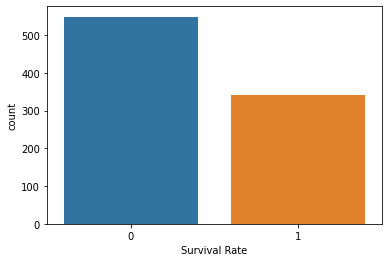

In [ ]:
sns.countplot(x=data["Survived"])
plt.xlabel("Survival Rate")

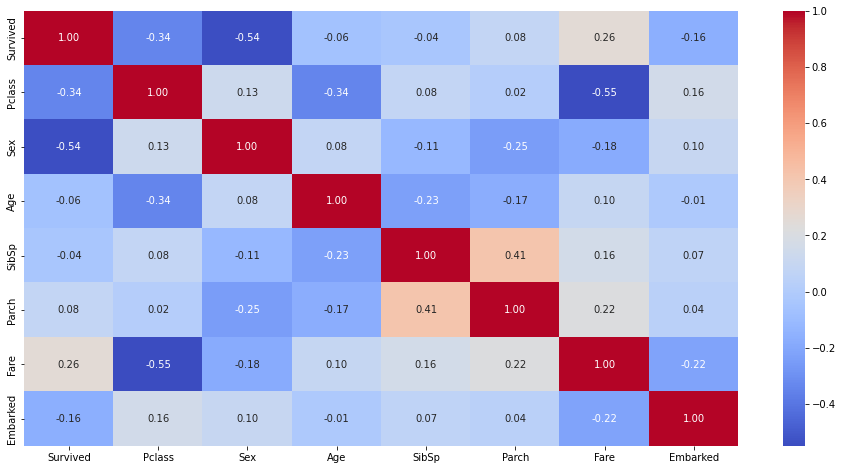

In [ ]:
plt.figure(figsize = (16,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f');

In [ ]:
x=data.drop("Survived",axis=1)
y=data["Survived"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

**LogisticRegression**

In [ ]:
model_1=LogisticRegression(max_iter=1000)
model_1.fit(x_train, y_train)
y_pred = model_1.predict(x_test)

In [ ]:
print('Accuracy Score: ', round(accuracy_score(y_pred_1,y_test),3))
print("--"*30)
print(classification_report(y_pred,y_test))

Accuracy Score:  0.81
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       109
           1       0.74      0.79      0.76        70

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179

